In [1]:
# Import de la librairie Numpy pour les opérations sur les array
import numpy as np

# Import de la librairies matplotlib pour animer les résultats
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

# Permet d'avoir des plot interactifs sur Jupyter
%matplotlib widget

# Redéfinition des couleurs par défaut de matplotlib
from cycler import cycler  

red    = "#B77673"
green  = "#73B798"
blue   = "#7673B7"
orange = "#FFB247"
purple = "#B19CD9"
brown  = "#B1907F"
pink   = "#F0B6D5"
gray   = "#CCCCC4"
yellow = "#FBF38A"

mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.prop_cycle'] = cycler('color', [blue, red, green, orange, purple, pink, brown, gray, yellow])

L'aire d'un cercle de rayon $r$ se calcula par la formule $A = \pi r^2$. Si le rayon d'un cercle est 1 unité, son aire est donc égale à $\pi$ (unité$^2$). 

En utilisant cette connaissance, il est possible de calculer pi de plusieurs façons différentes. Trois de ces façons seront abordées dans ce TP 

- Le calcul de l'aire d'un demi-cercle par la méthode de Riemann
- L'encadrement par les aires de polygones réguliers
- Le calcul probabiliste (Monte Carlo) 

# Approximation de $\pi$ par calcul d'une intégrale

L'aire d'un demi-cercle centré en (0, 0) et de rayon 1 vaut $\frac{\pi}{2}$, et peut se calculer comme une intégrale en utilisant l'équation du cercle $x^2 + y^2 = 1$ 

$$ \int_{-1}^{1} \sqrt{1 - x^2} \text{d} x = \frac{\pi}{2}$$

L'objectif de cette partie est de calculer cette intégrale entre 0 et 1 de deux façons différentes afin d'évaluer $\pi$

**Écrire une fonction qui, pour une valeur de x, donne la valeur de y > 0 telle que le point (x,y) soit situé sur le cercle de rayon 1 centré en (0, 0)**

In [33]:
def cercle(x):
    return np.sqrt(1 - x**2)

## Première approche : somme d'aires de rectangles

Dans un premier temps, nous allons approximer que l'intégrale peut se découper en une somme d'aire de rectangles 

$$ \int_{a}^{b} f(x) \text{d}x \approx (b-a) f(a)  $$

Plus l'intervalle $[a,b]$ est petite, plus cette approximation sera valable

**Écrire une fonction qui, pour un nombre N d'intervalles entre -1 et 1, donne la valeur approximée de l'aire du cercle**

In [94]:
def integrale_rectangles(nombre_intervalles):
    points = np.linspace(0, 1, nombre_intervalles)
    dx     = points[1] - points[0]
    return dx * np.sum( cercle( points[:-1] ) )

**Pour différents nombres d'intervalles, calculer la valeur approximée de $\pi$ et afficher un graphique représentant l'évolution de l'erreur de calcul en fonction du nombre d'intervalles**

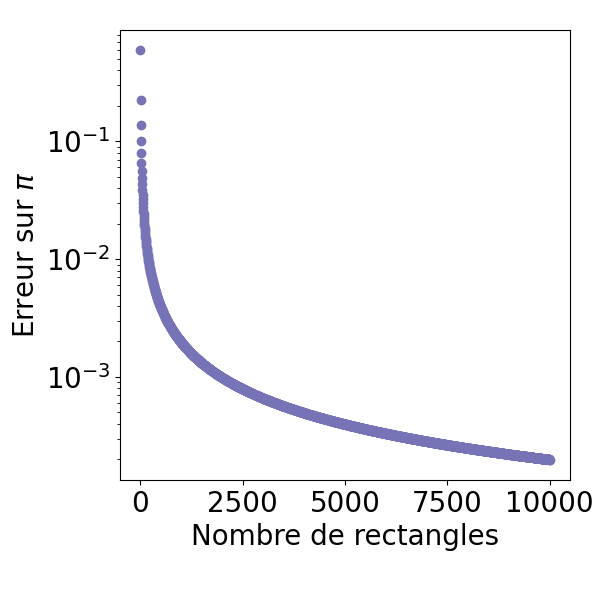

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

n  = np.arange(3, 10000, 5)
pi_estimation_rectangles = np.array([4*integrale_rectangles(i) for i in n])

ax.scatter(n, pi_estimation_rectangles-np.pi)
ax.set_yscale("log")

ax.set_ylabel("Erreur sur $\pi$")
ax.set_xlabel("Nombre de rectangles")

fig.subplots_adjust(top=0.95, bottom=0.2, right=0.95, left=0.2)

Dans un second temps, nous allons approximer que l'intégrale peut se découper en une somme d'aire de trapèzes 

$$ \int_{a}^{b} f(x) \text{d}x \approx (b-a) \frac{f(a)+f(b)}{2}  $$

Plus l'intervalle $[a,b]$ est petite, plus cette approximation sera valable

**Écrire une fonction qui, pour un nombre N d'intervalles entre -1 et 1, donne la valeur approximée de l'aire du cercle**

In [99]:
def integrale_trapezes(nombre_intervalles):
    points = np.linspace(0, 1, nombre_intervalles)
    dx     = points[1] - points[0]
    return dx * np.sum( cercle( points[:-1] ) + cercle( points[1:]) ) / 2

**Pour différents nombres d'intervalles, calculer la valeur approximée de $\pi$ et afficher un graphique représentant l'évolution de l'erreur de calcul en fonction du nombre d'intervalles**

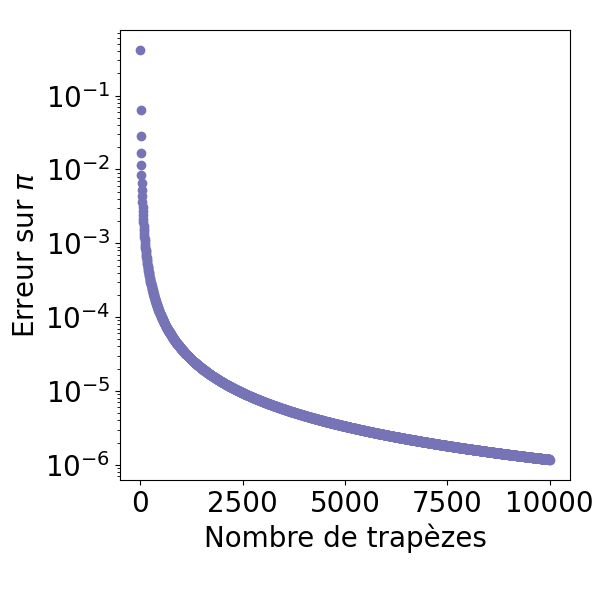

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

n  = np.arange(3, 10000, 5)
pi_estimation_trapezes = np.array([4*integrale_trapezes(i) for i in n])

ax.scatter(n, np.pi-pi_estimation_trapezes)
ax.set_yscale("log")

ax.set_ylabel("Erreur sur $\pi$")
ax.set_xlabel("Nombre de trapèzes")

fig.subplots_adjust(top=0.95, bottom=0.2, right=0.95, left=0.2)

**Sur un même graphique, représenter l'évolution des erreurs pour les deux méthodes précédentes, commenter**

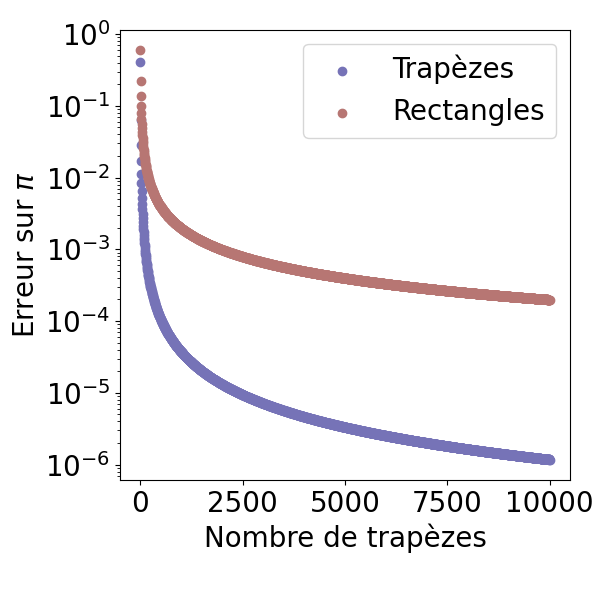

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.scatter(n, np.pi-pi_estimation_trapezes, label="Trapèzes")
ax.scatter(n, pi_estimation_rectangles-np.pi, label="Rectangles")
ax.set_yscale("log")

ax.set_ylabel("Erreur sur $\pi$")
ax.set_xlabel("Nombre de trapèzes")

ax.legend()

fig.subplots_adjust(top=0.95, bottom=0.2, right=0.95, left=0.2)

# Encadrement de $\pi$ par encadrement d'aires de polygones

## Polygone inscrit


Commençons par le calcul des coordonnées des sommets d'un polygone régulier de $n$ côtés. Il s'agit de déterminer un ensemble de $n$ points séparés d'une distance angulaire équivalente placés sur le cercle unitaire. Pour des raisons pratiques, on choisira le premier point pour un angle de $\theta = -\frac{\pi}{2}$ 

$$ \left\{\begin{split}
 x_n &= \cos \left( n \frac{2\pi}{N} - \frac{\pi}{2} \right) \\
 y_n &= \sin \left( n \frac{2\pi}{N} - \frac{\pi}{2} \right) \\ 
\end{split}\right. $$

**Écrire une fonction permettant de calculer les positions des sommets d'un polygone régulier inscrit au cercle unité d'un nombre arbitraire de côtés**

In [2]:
def polygone_inscrit(nombre_cotes, depart=-np.pi/2):
    '''
        Construit les sommets d'un polygone régulier inscrit dans le cercle unité
        
        Parametres :
        ------------
            nombre_cotes : int 
                Nombre de cotés du polygone
            depart       : float
                Angle de départ pour la construction
                
        Return :
        --------
            sommets      : np.array( nombre_cotes, 2)
                Les coordonnées (x,y) des sommets du polygone
    '''
    # Liste de dimensions nombre_cotes x 2 contenant les coordonnées x, y des sommets
    sommets = (np.arange( 2*nombre_cotes , dtype=float) % nombre_cotes).reshape( (nombre_cotes, 2), order='F')
    
    # x = cos(2pin/N - pi/2)    
    sommets[:, 0] = np.cos(2*np.pi*sommets[:,0]/nombre_cotes + depart)
    sommets[:, 1] = np.sin(2*np.pi*sommets[:,1]/nombre_cotes + depart)
    
    return sommets

## Polygone exinscrit

Le calcul des coordonnées des sommets du polygone exinscrit est légèrement plus complexe. Chaque sommet du polygone inscrit dans le cercle est situé au centre d'une arrête du polygone encadrant le cercle. De plus, cette arrête est perpendiculaire au segment reliant le centre du cercle au point du polygone inscrit. Les arrêtes du polygones contenant le cercle sont donc situées sur une droite d'équation cartésienne

$$ - x_n \cdot x - y_n \cdot y + ( x_n^2 + y_n^2)  = 0$$

Les sommets du polygone contenant le cercle sont situés aux intersections de ces diverses droites, il est donc possible de trouver leurs coordonnées 

$$ \left\{ \begin{split}
X_n &= \frac{ -y_n \cdot ( x_{n+1}^2 + y_{n+1}^2 ) - y_{n+1} \cdot ( x_n^2 + y_n^2 ) }{ x_n \cdot y_{n+1} - x_{n+1} \cdot y_n} \\
Y_n &= \frac{ x_{n+1} \cdot ( x_{n}^2 + y_{n}^2 ) - x_{n} \cdot ( x_{n+1}^2 + y_{n+1}^2 ) }{ x_n \cdot y_{n+1} - x_{n+1} \cdot y_n} \\
\end{split}\right. $$ 

Ce qui peut se simplifier 

$$ \left\{ \begin{split}
X_n &= \frac{ -y_n + y_{n+1}  }{ x_n \cdot y_{n+1} - x_{n+1} \cdot y_n} \\
Y_n &= \frac{ x_{n} - x_{n+1}  }{ x_n \cdot y_{n+1} - x_{n+1} \cdot y_n} \\
\end{split}\right. $$

**Écrire une fonction permettant de calculer les positions des sommets d'un polygone régulier exinscrit au cercle unité d'un nombre arbitraire de côtés**

In [3]:
def polygone_exinscrit(nombre_cotes, depart=-np.pi/2):
    '''
        Construit les sommets d'un polygone régulier exinscrit au cercle unité 
        
        Parametres :
        ------------
            nombre_cotes : int 
                Nombre de cotés du polygone
            depart       : float
                Angle de départ pour la construction
                
        Return :
        --------
            sommets      : np.array( nombre_cotes, 2)
                Les coordonnées (x,y) des sommets du polygone
    '''
    
    # Construit le polygone inscrit
    xy = polygone_inscrit( nombre_cotes, depart=-np.pi/2)
    x = xy[:,0]
    y = xy[:,1]
    
    sommets = np.zeros( (nombre_cotes, 2), dtype=float)
    
    sommets[:,0] = (-y + np.roll(y, -1) )/(x * np.roll(y, -1) - np.roll(x, -1) * y)
    sommets[:,1] = (x - np.roll(x, -1) )/(x * np.roll(y, -1) - np.roll(x, -1) * y)
    
    return sommets


## Calcul de l'aire d'un polygone régulier

Le calcul de l'aire d'un polygone régulier peut s'effectuer simplement en connaissant son périmètre ($p$) et son apothème ($a$)

$$ A = \frac{p \cdot a}{2} $$

L'apothée se calcule simplement 

$$a_N = \frac{l_n}{2 \cdot \tan \left( \frac{2\pi}{N} \right)} $$

Où $l_n$ est la longueur d'un des côtés

In [4]:
def aire(sommets):    
    segment = np.sqrt( (sommets[0,0]-sommets[1,0])**2 + (sommets[0,1]-sommets[1,1])**2 )
    
    perimetre = sommets.shape[0] * segment
    apotheme  = segment / ( 2 * np.tan( np.pi / sommets.shape[0] ) )
    
    return perimetre * apotheme / 2

## Encadrement de $\pi$

**Pour différentes nombres de côtés, calculer un encadrement pour $\pi$, puis afficher un graphique représentant l'évolution de cet encadrement en fonction du nombre de côtés**

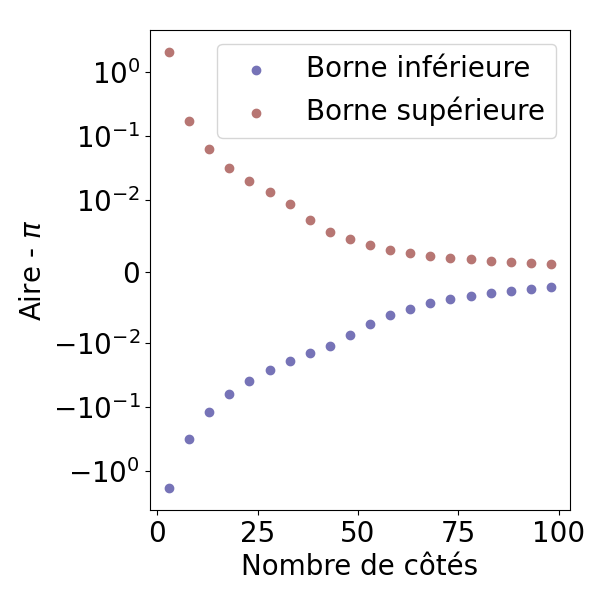

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

n = np.arange(3, 100, 5)
lower_bound = np.array([ aire(polygone_inscrit(i)) for i in n])
upper_bound = np.array([ aire(polygone_exinscrit(i)) for i in n])

ax.scatter(n, lower_bound-np.pi, label="Borne inférieure")
ax.scatter(n, upper_bound-np.pi, label="Borne supérieure")

ax.set_ylabel("Aire - $\pi$")
ax.set_xlabel("Nombre de côtés")

ax.set_yscale('symlog', linthresh=1e-2)

ax.legend()

fig.subplots_adjust(top=0.95, bottom=0.15, left=0.25, right=0.95)

## Animation de l'encadrement

**Compléter le code ci-dessous afin de réaliser une animation montrant, pour différents nombres de côtés, les polygones inscrits et exinscrits au cercle unité**

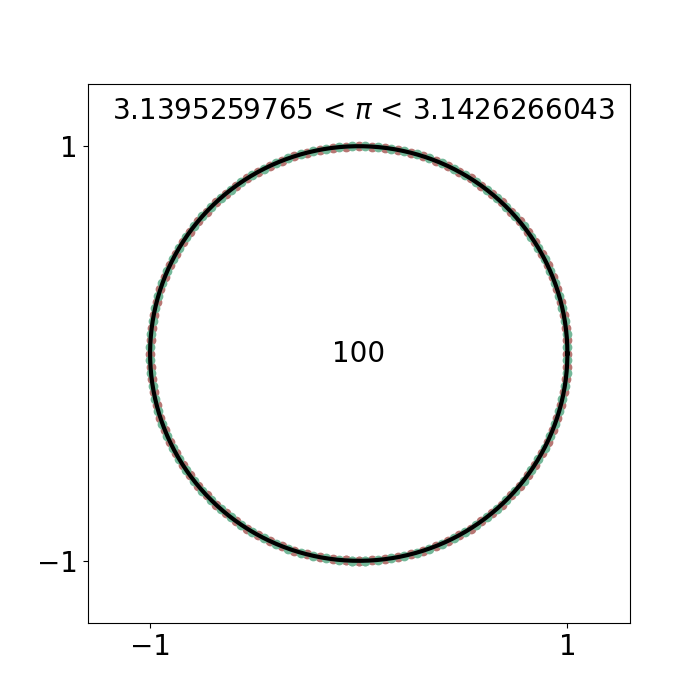

In [23]:
'''
    PARAMETRES
'''

# Nombre de côtés maximum à atteindre dans l'animation
nombre_cotes_maximum = 100
# Temps en ms entre deux images de l'animation
intervalle_animation = 100
# Souhaite-t-on enregistrer l'animation dans un fichier Gif ? 
save_gif             = "/home/leogaspard/Téléchargements/encadrement_pi.gif"


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
theta = np.linspace(0, 2*np.pi, 500)
x = np.cos(theta)
y = np.sin(theta)

ax.plot(x, y, color='black', lw=3, zorder=3)

lines = []
pi_eval  = plt.text(0.16, 0.83, "{:12.10f} < $\pi$ < {:12.10f}".format(0, 100), fontsize=20, transform=plt.gcf().transFigure)
nbr_cote = plt.text(0.0, 0.0, '{:.0f}'.format(0), fontsize=20, ha='center', va='center')

def animate(frame_num):
    global lines
    
    # Le plus petit nombre de côtés possible pour un polygone est 3    
    nombre_cotes = frame_num + 3
    
    # Supprime les lignes correspondant à l'image précédente
    for i in lines:
        i.remove()
    lines = []
    
    '''
        Calculer les sommets des polygones inscrits et exinscrits
    '''
        
    inscrit   = polygone_inscrit( nombre_cotes )
    exinscrit = polygone_exinscrit( nombre_cotes ) 
    
    '''
        Calculer l'aire des polygones inscrits et exinscrits
    '''
    
    aire_inscrit   = aire(inscrit)
    aire_exinscrit = aire(exinscrit)
    
    '''
        Dessiner les polygones sur le graphique et stocker les dessins dans la liste "lines"
    '''
    
    lines.append( ax.plot( inscrit[:,0], inscrit[:,1], color=red, marker='o', lw=3)[0] )
    lines.append( ax.plot( [inscrit[0, 0], inscrit[-1, 0]], [inscrit[0,1], inscrit[-1,1]], color=red, marker='o', lw=3)[0] )
    lines.append( ax.plot( exinscrit[:,0], exinscrit[:,1], color=green, marker='o', lw=3)[0] )
    lines.append( ax.plot( [exinscrit[0, 0], exinscrit[-1, 0]], [exinscrit[0,1], exinscrit[-1,1]], color=green, marker='o', lw=3)[0] )
    
    '''
        Mettre à jour le texte de l'encadrement et du nombre de côtés du polygone
    '''
    
    pi_eval.set_text("{:12.10f} < $\pi$ < {:<12.10f}".format(aire_inscrit, aire_exinscrit))   
    nbr_cote.set_text("{:.0f}".format(nombre_cotes))

ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])

anim = FuncAnimation(fig, animate, nombre_cotes_maximum-2, interval=intervalle_animation, repeat=False)
if save_gif is not None:
    anim.save(save_gif, writer='imagemagick', fps=5)

# Méthode de Monte Carlo

La méthode de Monte Carlo est une méthode utilisée pour calculer $\pi$ utilisant des probabilités et un tirage aléatoire (d'où le nom Monte Carlo, en référence au casino de Monaco)

L'idée de cette méthode est simple imaginons le quart d'un cercle de rayon 1, centré en (0, 0), ainsi qu'un carré de côté 1 dont le coin inférieur gauche se situe en (0, 0) tel que le quart de cercle soit intégralement compris dans le carré

Maintenant, imaginons que l'on lance une aiguille à coudre sur ce dessin. Il y a trois cas de figure possibles 
- La pointe de l'aiguille se situe à l'intérieur du quart de cercle
- La pointe de l'aiguille se situe à l'extérieur du quart de cercle mais dans le carré
- La pointe de l'aiguille se situe à l'extérieur du carré

Nous nous intéresseront seulement aux cas pour numéro 1 et 2, c'est-à-dire aux cas ou la pointe de l'aiguille se situe à l'intérieur du carré. Parmis tous ces tirages, la probabilité que l'aiguille soit dans le carré est donc égale à 1 

$$p(\text{dans le carré}) = 1 $$

Quelle est la probabilité que l'aiguille se situe dans le cercle ? En supposant que la position de l'aiguille soit purement due au hasard, il s'agit simplement du rapport de l'aire du quart de cercle divisé par l'aire du carré 

$$p(\text{dans le quart de cercle}) = \frac{\pi}{4} $$

Maintenant, si nous lançons un grand nombre d'aiguilles, le rapport entre le nombre d'aiguilles dont la pointe est dans le quart de cercle par le nombre d'aiguilles dont la pointe est dans le carré nous donne donc une estimation de pi

$$\frac{\#\text{dans le quart de cercle}}{\#\text{dans le carré}} \approx \frac{\pi}{4} $$

---
**Écrire une fonction qui, donné un point (ou une liste de points) de coordonnées (x,y), renvoie un booléen True si il se situe dans le quart de cercle, False sinon**

In [2]:
def dans_le_cercle(x, y):
    return np.sqrt(x**2 + y**2) < 1    

## Différentes définitions de l'aléatoire 

L'aléatoire étant un élément central de ce calcul de $\pi$, il est crucial de correctement l'utiliser. Pour cela, nous allons utiliser les fonctions du module numpy.random.

Il existe un grand nombre de distributions dans ce module, nous allons ici comparer les distributions **uniform**, **normal** et **logistic**

**Générer pour ces 3 différentes distributions un grand nombre de points aléatoirement choisis, puis afficher un histogramme de la distribution pour chacune de ces distributions, utiliser ces histogrammes pour déterminer laquelle de ces 3 distributions est la plus appropriée pour notre calcul**

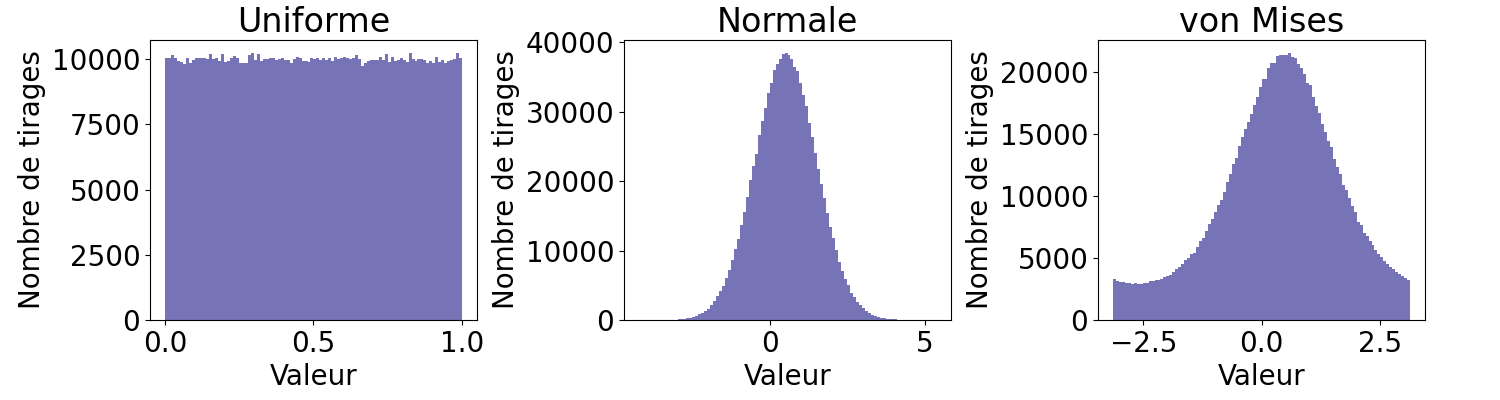

In [3]:
n_points = 1000000
n_bins   = 100

points_uniform  = np.random.uniform(0, 1, n_points)
points_normal   = np.random.normal(0.5, 1.0, n_points)
points_vonmises = np.random.vonmises(0.5, 1.0, n_points)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ign = ax[0].hist(points_uniform, bins=n_bins)
ign = ax[1].hist(points_normal, bins=n_bins)
ign = ax[2].hist(points_vonmises, bins=n_bins)

ax[0].set_title("Uniforme")
ax[1].set_title("Normale")
ax[2].set_title("von Mises")

for i in ax:
    i.set_xlabel("Valeur")
    i.set_ylabel("Nombre de tirages")

fig.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.95, wspace=0.45)

**Maintenant que la distribution est choisis, écrire un fonction qui prend en entrée un nombre de tirages à effectuer, génére ce nombre de points aléatoires et calcule une estimation de $\pi$**

In [4]:
def eval_pi_monte_carlo(n_points):
    x = np.random.uniform(0, 1.0, n_points)
    y = np.random.uniform(0, 1.0, n_points)
    
    dedans = np.sum( dans_le_cercle(x, y) )  
    
    return 4 * dedans / n_points

**Calculer une approximation de $\pi$ pour différents nombres de tirages et afficher l'erreur effectuée sur sur un graphique. Cette méthode produit-elle des résultats fiables ?**

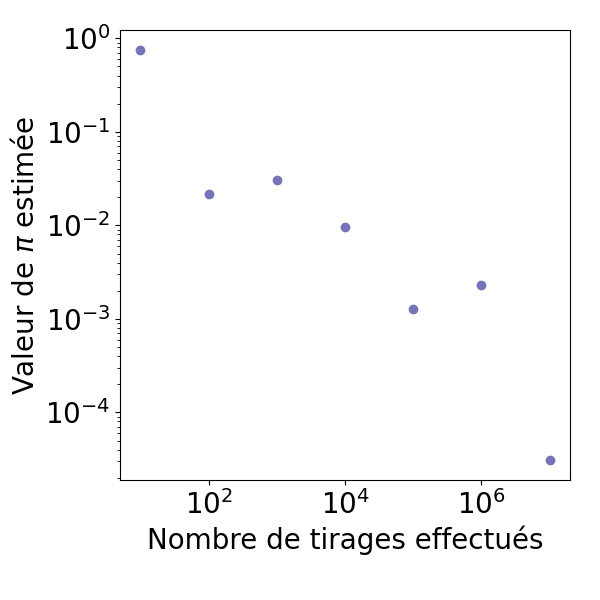

In [14]:
points = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
pis    = np.array([eval_pi_monte_carlo(int(i)) for i in points])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter( points, np.absolute(pis - np.pi) )

ax.set_ylabel("Valeur de $\pi$ estimée")
ax.set_xlabel("Nombre de tirages effectués")

ax.set_xscale("log")
ax.set_yscale("log")

fig.subplots_adjust(top=0.95, left=0.2, right=0.95, bottom=0.2)

**Pour un même nombre de points, effectuer plusieurs calculs de $\pi$, qu'observe-t-on ? Que pourrait-on faire pour avoir une meilleure idée de la réelle valeur ?**

In [18]:
n_points = int(1e6)
n_tirages = 10

for i in range(n_tirages):
    print("pi = {:12.10f}".format(eval_pi_monte_carlo(n_points)))

pi = 3.1412000000
pi = 3.1450320000
pi = 3.1413240000
pi = 3.1424200000
pi = 3.1392120000
pi = 3.1404840000
pi = 3.1433960000
pi = 3.1449920000
pi = 3.1419160000
pi = 3.1453040000


**Effectuer un grand nombre de simulations différentes contenant un grand nombre de points, faire un graphique de l'histogramme des distribution des valeurs obtenues. Qu'observe-t-on ?**

In [85]:
n_points  = int(1e6)
n_tirages = 5000
pis       = np.array([ eval_pi_monte_carlo(n_points) for i in range(n_tirages)])
n_bins    = 30

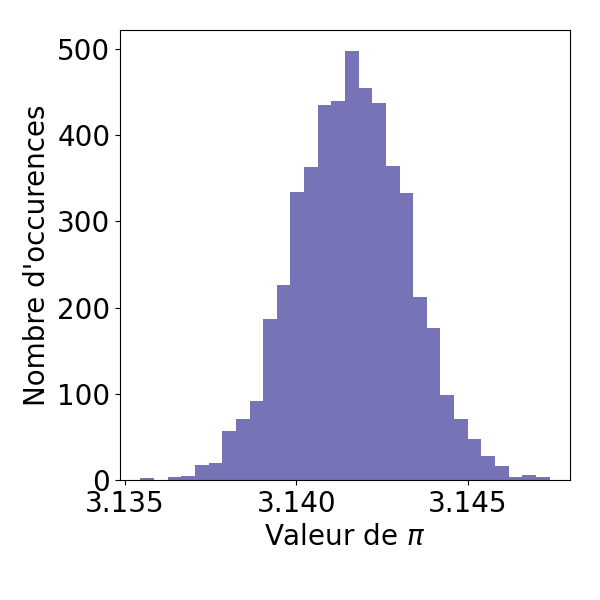

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nombre, bins, x = ax.hist( pis, bins=n_bins ) 

ax.set_xlabel("Valeur de $\pi$")
ax.set_ylabel("Nombre d'occurences")

fig.subplots_adjust(bottom=0.2, left=0.2, right=0.95, top=0.95)

Les valeurs trouvées pour $\pi$ devraient être placées selon une cloche, centrée sur la valeur véritable de $\pi$. Si l'aléatoire du tirage est parfait, le nombre d'apparition de chaque valeur devrait pouvoir déterminé par une distribution normale

$$ n(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

Dans cette distribution, $\mu$ est le centre de la gaussienne, c'est à dire la valeur véritable de $\pi$ et $\sigma$ est la déviation standard, ce qui mesure la dispersion autour de cette moyenne

_Notez que cette formule nécessite de connaître $\pi$, pour cela, utiliser la valeur définie par le module numpy_

**Écrire une fonction qui, pour une moyenne $\mu$, une déviation standard $\sigma$ et une valeur $x$ donne la valeur associée**

In [3]:
def distribution_normale(x, mu=1.0, sigma=0.5):
    return 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ( (x-mu)/sigma)**2)

**Reprendre le graphique précédemment dessiné, y ajouter la courbe correspondant à la fonction normale représentant au mieux la distribution obtenue**

_Les valeurs optimales peuvent être obtenues grâce à la fonction curve_fit du module scipy.optimize. Pour cela, utiliser les centres des bins de l'histogramme comme valeurs de $\pi$_

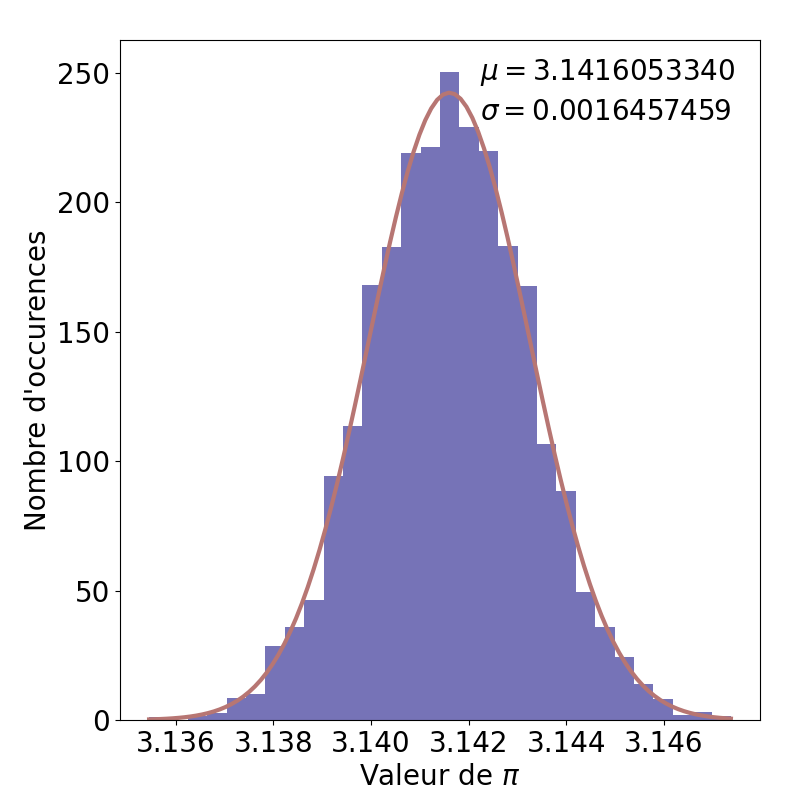

In [87]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

nombre, bins, x = ax.hist( pis , bins=n_bins, density=True ) 

(mu, sigma), c = curve_fit(distribution_normale, (bins[:-1]+bins[1:])/2, nombre)

x = np.linspace(bins[0], bins[-1], 100)
y = distribution_normale(x, mu=mu, sigma=sigma)

ax.plot(x, y, lw=3)

ax.text(0.6, 0.9, "$\mu = {:<12.10f}$".format(mu), transform=plt.gcf().transFigure, family='monospace')
ax.text(0.6, 0.85, "$\sigma = {:<12.10f}$".format(sigma), transform=plt.gcf().transFigure, family='monospace')

ax.set_xlabel("Valeur de $\pi$")
ax.set_ylabel("Nombre d'occurences")

fig.subplots_adjust(bottom=0.1, left=0.15, right=0.95, top=0.95)

## Pour aller plus loin, animation de la section précédente

**Utiliser les fonctions écrites précédement ainsi que les connaissances acquises pour réaliser une animation montrant les tirages aléatoires et les valeurs successives de $\pi$ obtenues**

In [4]:
nombre_points    = int(1e5)
nombre_tirages   = 1000
intervalle       = 1
points_affichage = 400
nombre_bins      = 30
save_gif         = "/home/leogaspard/Téléchargements/pi_mc.gif"

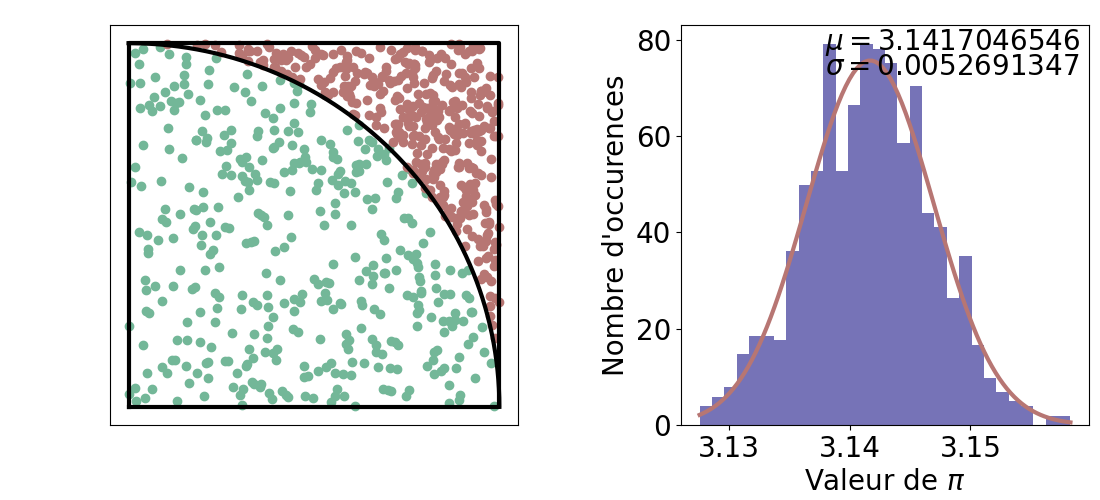

In [5]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

theta = np.linspace(0, np.pi/2, 500)

x = np.cos(theta)
y = np.sin(theta)

ax[0].plot(x, y, lw=3, color='black', zorder=4)
ax[0].plot([0, 0, 1, 1, 0], [0, 1, 1, 0, 0], lw=3, color='black', zorder=4)
ax[0].set_xticks([])
ax[0].set_yticks([])

pis = np.array([])
sc  = []

def animate(frame_num):
    global sc
    global pis
    
    for i in sc:
        i.remove()
    sc = []
    ax[1].clear()
    x = np.random.uniform(0, 1.0, nombre_points)
    y = np.random.uniform(0, 1.0, nombre_points)
    
    dedans = dans_le_cercle(x, y)
    
    pi =  4 * np.sum(dedans) / nombre_points
    
    pis = np.append(pi, pis)
    
    sc.append( ax[0].scatter( x[dedans][:points_affichage], y[dedans][:points_affichage], color=green) )
    sc.append( ax[0].scatter( x[~dedans][:points_affichage], y[~dedans][:points_affichage], color=red) )
    
    nombre, bins, x = ax[1].hist( pis , bins=nombre_bins, density=True ) 

    (mu, sigma), c = curve_fit(distribution_normale, (bins[:-1]+bins[1:])/2, nombre)

    x = np.linspace(bins[0], bins[-1], 100)
    y = distribution_normale(x, mu=mu, sigma=sigma)

    ax[1].plot(x, y, lw=3)    
    ax[1].text(0.75, 0.9, "$\mu = {:<12.10f}$".format(mu), transform=plt.gcf().transFigure, family='monospace')
    ax[1].text(0.75, 0.85, "$\sigma = {:<12.10f}$".format(sigma), transform=plt.gcf().transFigure, family='monospace')
    ax[1].set_xlabel("Valeur de $\pi$")
    ax[1].set_ylabel("Nombre d'occurences")
fig.subplots_adjust(top=0.95, bottom=0.15, left=0.1, right=0.99, wspace=0.4) 

anim = FuncAnimation(fig, animate, nombre_tirages, interval=intervalle, repeat=False)
if save_gif is not None:
    anim.save(save_gif, writer='imagemagick', fps=60)